importing required packages

In [1]:
import numpy as n
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s


ignoring the warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

getting data from csv file

In [3]:
df=p.read_csv('loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [5]:
df['Principal'].value_counts()

1000    258
800      81
300       3
900       2
500       2
Name: Principal, dtype: int64

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    346 non-null    int64 
 1   Unnamed: 0      346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [8]:
df.describe()


,Unnamed: 0.1,Unnamed: 0,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [9]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [10]:
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


converting date time objects

In [11]:
df['effective_date']=p.to_datetime(df['effective_date'])
df['due_date']=p.to_datetime(df['due_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


count status for laon status

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64


<AxesSubplot: xlabel='loan_status', ylabel='count'>

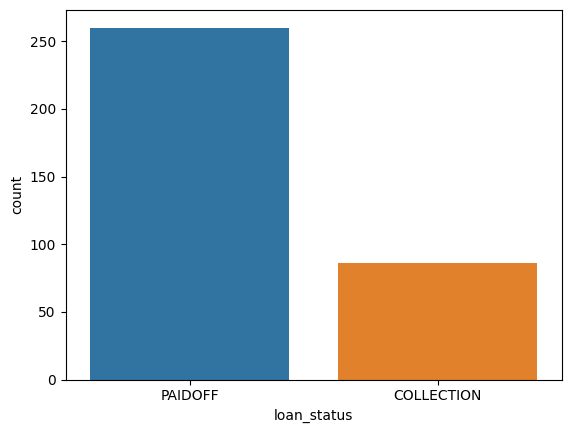

In [12]:
print(p.Series(df['loan_status']).value_counts())
s.countplot(x='loan_status' ,data=df)

(array([  3.,   0.,   2.,   0.,   0.,   0.,   0.,  81.,   2., 258.]),
 array([ 300.,  370.,  440.,  510.,  580.,  650.,  720.,  790.,  860.,
         930., 1000.]),
 <BarContainer object of 10 artists>)

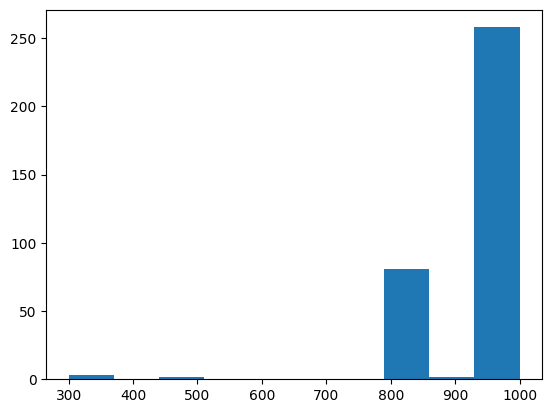

In [13]:
plt.hist(df['Principal'])

### data visualisation

plot - paindoff and collection , separation based on gender

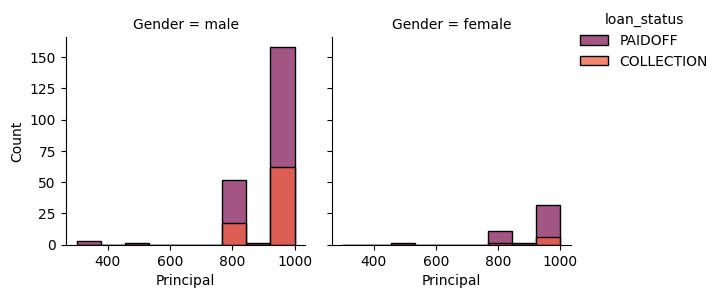

In [14]:
bins=n.linspace(df.Principal.min(),df.Principal.max(),10)

fg1=s.FacetGrid(data=df,col='Gender',palette='rocket',hue='loan_status')
fg1.map_dataframe(s.histplot,'Principal',bins=bins,)
fg1.add_legend()
s.move_legend(fg1, "upper right")


plot - paindoff and collection , separation based on gender and age

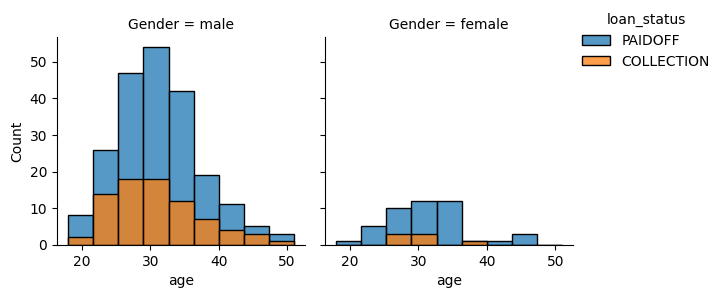

In [15]:
bins=n.linspace(df.age.min(),df.age.max(),10)
fg2=s.FacetGrid(data=df,col='Gender',hue='loan_status',)
fg2.map_dataframe(s.histplot,'age',bins=bins,)
fg2.add_legend()
s.move_legend(fg2,'upper right')

### pre-processing --- feature selcetion

dayofweek for effectivedate

In [16]:
df['dayofweek']=df['effective_date'].dt.day_of_week
df['dayofweek'].value_counts()

6    166
0     87
5     31
2     31
1     20
4      8
3      3
Name: dayofweek, dtype: int64

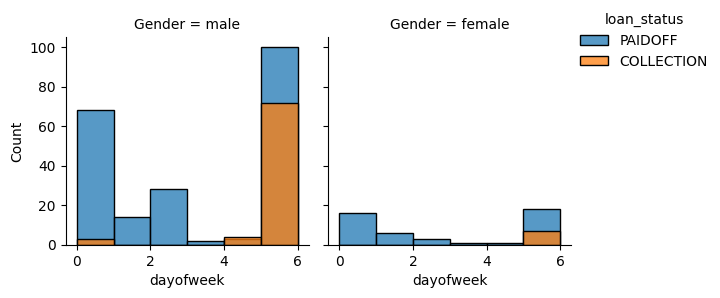

In [17]:
bins=[0,1,2,3,4,5,6]

fg3=s.FacetGrid(data=df,col='Gender',hue='loan_status')
fg3.map_dataframe(s.histplot,'dayofweek',bins=bins)
fg3.add_legend()
s.move_legend(fg3,'upper right')

We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [18]:
df['weekend']=df['dayofweek'].apply(lambda x: 1 if (x>3) else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


gender

In [19]:
gender_group=df.groupby(['Gender'])


In [20]:
gender_group['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [21]:
df.replace(to_replace=['female','male'],value=[1,0],inplace=True)
# df['Gender']=df['Gender'].apply(lambda x: 1 if (x=='female') else 0)

In [22]:
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


education

In [23]:
group_edu=df.groupby(['education'])
type(group_edu)

pandas.core.groupby.generic.DataFrameGroupBy

In [24]:
(group_edu['loan_status'].value_counts(normalize=True))

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [25]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [26]:
df[df['education']=='Master or Above']

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
50,59,59,PAIDOFF,800,15,2016-09-11,2016-09-25,39,Master or Above,0,6,1
293,342,342,COLLECTION,1000,15,2016-09-11,2016-09-25,50,Master or Above,0,6,1


In [27]:
feature=df[['Principal','terms','age','Gender','weekend']]
feature=p.concat([feature,p.get_dummies(df['education'])],axis=1)
feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


In [28]:
feature['Master or Above'].value_counts()

0    344
1      2
Name: Master or Above, dtype: int64

In [29]:
feature.drop(['Master or Above'],axis=1,inplace=True)

In [30]:
feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [31]:
labels=df['loan_status'].apply(lambda x: 1 if (x=='PAIDOFF') else 0 )

spliting the data into training and testing set

In [32]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(feature,labels,test_size=0.2,random_state=0) 
train_x_df=train_x


standardisation

In [33]:
from sklearn import preprocessing
standard_train_x= preprocessing.StandardScaler().fit(train_x).transform(train_x)
standard_test_x= preprocessing.StandardScaler().fit(test_x).transform(test_x)


normalisation

In [34]:
from sklearn.preprocessing import Normalizer,normalize

normalize_train_x=Normalizer().fit(train_x).transform(train_x)
normalize_test_x=Normalizer().fit(test_x).transform(test_x)


## k - Nearest neighbour (KNN)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x,train_y)


KNeighborsClassifier()

In [36]:
test_x[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
327,1000,30,25,0,1,0,1,0
64,1000,30,35,0,1,0,0,1
315,800,30,33,0,1,0,1,0
175,1000,30,27,0,0,0,0,1
6,1000,30,28,0,1,0,0,1


In [37]:
knn.score(test_x,test_y)

0.7857142857142857

In [38]:
knn.fit(standard_train_x,train_y)
knn.score(standard_test_x,test_y)

0.7142857142857143

In [39]:
knn.fit(normalize_train_x,train_y)
knn.score(normalize_test_x,test_y)

0.8

performing knn over a range(3-10) to find best K

In [40]:
krange=n.arange(3,10)
score=[]

In [41]:
for i in krange:
    knn1=KNeighborsClassifier(n_neighbors=i)
    knn1.fit(train_x,train_y)
    score.append(knn1.score(test_x,test_y))


In [42]:
score

[0.7285714285714285,
 0.6857142857142857,
 0.7857142857142857,
 0.7571428571428571,
 0.8714285714285714,
 0.8571428571428571,
 0.8714285714285714]

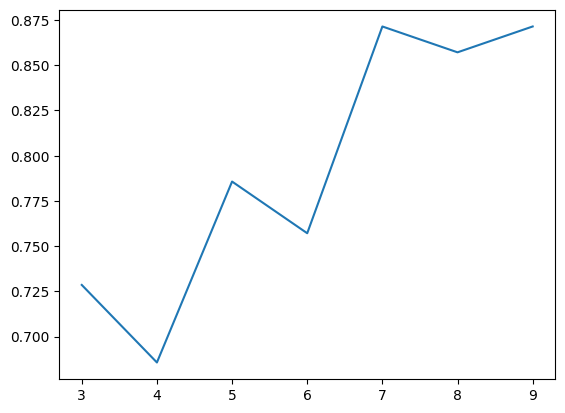

In [43]:
plt.plot(krange,score)

from the above graph we can conclude that K=7

In [44]:
train_x=train_x.values
train_y=train_y.values
test_x=test_x.values
test_y=test_y.values

knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(train_x,train_y)
(knn.score(test_x,test_y))

0.8714285714285714

In [45]:
feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


## decision tree

In [46]:
feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


removing age from feature set

In [47]:
feature.drop(['age'],axis='columns').head()

,Principal,terms,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,0,0,0,1,0
1,1000,30,1,0,1,0,0
2,1000,15,0,0,0,0,1
3,1000,30,1,1,0,0,1
4,1000,30,0,1,0,0,1


In [48]:
from sklearn.model_selection import train_test_split
train_x1,test_x1,train_y1,test_y1=train_test_split(feature.drop(['age'],axis='columns'),labels,test_size=0.2,random_state=0) 
train_x1=train_x1.values
train_y1=train_y1.values
test_x1=test_x1.values
test_y1=test_y1.values

decision tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(train_x1,train_y1)
dt.score(test_x1,test_y1)

0.7571428571428571

## support vector machine

** high gamma, high regularisation -> high accurate; 

In [50]:
train_x.shape,type(train_x),train_x[0:5]


((276, 8),
 numpy.ndarray,
 array([[1000,   30,   27,    0,    0,    0,    1,    0],
        [ 800,   15,   44,    1,    1,    0,    1,    0],
        [1000,   30,   30,    0,    0,    0,    0,    1],
        [ 800,   15,   29,    0,    1,    0,    0,    1],
        [1000,   30,   26,    1,    1,    0,    0,    1]], dtype=int64))

In [51]:
train_x1.shape,type(train_x1),train_x1[0:5]


((276, 7),
 numpy.ndarray,
 array([[1000,   30,    0,    0,    0,    1,    0],
        [ 800,   15,    1,    1,    0,    1,    0],
        [1000,   30,    0,    0,    0,    0,    1],
        [ 800,   15,    0,    1,    0,    0,    1],
        [1000,   30,    1,    1,    0,    0,    1]], dtype=int64))

In [52]:
from sklearn.svm import SVC
svm=SVC(probability=True)
svm.fit(train_x,train_y)
svm.score(test_x,test_y)



0.8285714285714286

## logistic regression

In [53]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(train_x,train_y)
lr.score(test_x,test_y)

0.8857142857142857

## calculation metrics using test sets

 loading test set 

In [54]:
test_df = p.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [55]:
test_df['effective_date']=p.to_datetime(test_df['effective_date'])
test_df['due_date']=p.to_datetime(test_df['due_date'])
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [56]:
test_df['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

In [57]:
test_df['dayofweek']=test_df['effective_date'].dt.day_of_week
df['dayofweek'].value_counts()

6    166
0     87
5     31
2     31
1     20
4      8
3      3
Name: dayofweek, dtype: int64

In [58]:
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6


In [59]:
test_df['weekend']=test_df['dayofweek'].apply(lambda x: 1 if (x>3) else 0)
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [60]:
test_df.replace(to_replace=['female','male'],value=[1,0],inplace=True)
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [61]:
test_df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,50,1,Bechalor
1,300,7,35,0,Master or Above
2,1000,30,43,1,High School or Below
3,1000,30,26,0,college
4,800,15,29,0,Bechalor


In [62]:
test_df[test_df['education']=='Master or Above']

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
22,147,147,PAIDOFF,300,7,2016-09-12,2016-09-18,37,Master or Above,0,0,0


In [63]:
test_set=test_df[['Principal','terms','age','Gender','weekend']]
test_set=p.concat([test_set,p.get_dummies(test_df['education'])],axis=1)
test_set.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,50,1,0,1,0,0,0
1,300,7,35,0,1,0,0,1,0
2,1000,30,43,1,1,0,1,0,0
3,1000,30,26,0,1,0,0,0,1
4,800,15,29,0,1,1,0,0,0


In [64]:
test_set['Master or Above'].value_counts()

0    52
1     2
Name: Master or Above, dtype: int64

In [65]:
test_set.drop(['Master or Above'],axis='columns',inplace=True)
test_set.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [66]:
test_labels=test_df['loan_status'].apply(lambda x: 1 if (x=='PAIDOFF') else 0)
test_labels.value_counts()

1    40
0    14
Name: loan_status, dtype: int64

In [67]:
test_set.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [68]:
test_set_x=test_set.values

In [69]:
test_set_x[0:5]

array([[1000,   30,   50,    1,    0,    1,    0,    0],
       [ 300,    7,   35,    0,    1,    0,    0,    0],
       [1000,   30,   43,    1,    1,    0,    1,    0],
       [1000,   30,   26,    0,    1,    0,    0,    1],
       [ 800,   15,   29,    0,    1,    1,    0,    0]], dtype=int64)

In [70]:
test_labels[0:5]

0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

### calculating metrics

In [71]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

#### k - Nearest neighbour (KNN)

used age feature for training in previous

In [72]:
knn.score(test_set_x,test_labels.values)

0.7592592592592593

f1_Score

In [73]:
y_pred=knn.predict(test_set_x)
f1_score(test_labels.values,y_pred)


0.8602150537634409

jaccard score

In [74]:
jaccard_score(test_labels.values,y_pred)

0.7547169811320755

log loss

In [75]:
y_pred_prob=knn.predict_proba(test_set_x)
log_loss(test_labels.values,y_pred_prob)


1.155139802428302

### decision tree

In [76]:
test_set_x1=test_set.drop(['age'],axis=1).values


In [77]:
dt.score(test_set_x1,test_labels.values)

0.7407407407407407

f1 score

In [78]:
f1_score(test_labels.values,dt.predict(test_set_x1))

0.8292682926829269

jaccard score

In [79]:
jaccard_score(test_labels.values,dt.predict(test_set_x1))

0.7083333333333334

log loss

In [80]:
log_loss(test_labels.values,dt.predict_proba(test_set_x1))

1.1038252398041

### support vector machine

In [81]:
svm.score(test_set_x,test_labels.values)

0.7407407407407407

f1 score

In [82]:
f1_score(test_labels.values,svm.predict(test_set_x))

0.851063829787234

jaccard score

In [83]:
jaccard_score(test_labels.values,svm.predict(test_set_x))

0.7407407407407407

log loss

In [84]:
log_loss(test_labels.values,svm.predict_proba(test_set_x))

0.5718405647076731

### logistic regression

In [85]:
lr.score(test_set_x,test_labels)


0.7037037037037037

f1 score

In [86]:
f1_score(test_labels.values,lr.predict(test_set_x))

0.8222222222222222

jaccard score

In [87]:
jaccard_score(test_labels.values,lr.predict(test_set_x))

0.6981132075471698

log loss

In [88]:
log_loss(test_labels,lr.predict_proba(test_set_x))

0.4941764868680508

| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                |0.754    |0.860     |1.155    |
| Decision Tree      |0.708    |0.829     |1.103    |
| SVM                |0.740    |0.851     |0.571    |
| LogisticRegression |0.698    |0.822     |0.494    |
